In [147]:
import scipy.io as io
import plotly.offline as py
import plotly.graph_objs as go
from plotly.tools import FigureFactory as FF

import json
import numpy as np

In [149]:
mat = io.loadmat('data_Mg_GBperatom_seg_2Al_dump.mat')

length_A = mat['A'].shape[1]

def draw_peratom_energy(mat , gb_num):
    i = gb_num
    
    #extract data from the specified Grain Boundary. 
    atom_pos = mat['A']['peratom'][0,i][0,0]['pos']
    
    segE = mat['A']['Eseg'][0,i]
    #check whether this is a valid data?
    n1 = segE[:,0] != 0 
    segE = segE[n1,:]
    
    atom_ID = segE[:,0].astype(int) - 1
    atom_zaxis = atom_pos[atom_ID,2]
    
    gbE = mat['A']['GBE'][0,i][0][0]
    gb_tilt = mat['A']['GB_tilt'][0,i][0]
    gb_norm1 = mat['A']['GB_norm1'][0,i][0]
    
    #draw scatter plot of the data
    main = go.Scatter(x = atom_zaxis-min(atom_zaxis)-20, 
                  y = segE[:,1], 
                  marker={'color':'red', 'symbol':'circle-dot','size':3}, 
                  mode='markers',
                  name='Test'
                 )
    
    data = [main]
    
    layout = go.Layout(autosize = False, 
                   height = 800,
                   width = 800, 
                   xaxis={'title':'Distance from GB', 'zeroline':False},
                   yaxis = {'title':'Segeregation Energy(eV)','zeroline':False},
                   shapes =[{'type':'line', 
                            'x0':-25,
                            'x1':25,
                            'y0':np.mean(segE[:,1]),
                            'y1':np.mean(segE[:,1]),
                            'line':{'width':0.7
                                
                            }
                            }],
                   annotations = [
                       dict(
                       x = 0.08,
                       y = 0.925,
                       xref = 'paper',
                       yref = 'paper',
                       text = '$\\text{GB Energy: %4.1f}\ mJ/m^2$'%(gbE),
                       showarrow = False,
                       font = dict(size = 10)
                       ),
                       dict(
                       x = 0.08,
                       y = 0.90,
                       xref = 'paper',
                       yref = 'paper',
                       text = '$\\text{GB Tilt: [%d %d %d %d]}$'%(gb_tilt[0],
                                                              gb_tilt[1],
                                                              gb_tilt[2],
                                                              gb_tilt[3]),
                       showarrow = False,
                       font = dict(size = 10)
                       ),
                       dict(
                       x = 0.08,
                       y = 0.875,
                       xref = 'paper',
                       yref = 'paper',
                       text = '$\\text{GB Normal: [%d %d %d %d]}$'%(gb_norm1[0],
                                                                   gb_norm1[1],
                                                                   gb_norm1[2],
                                                                   gb_norm1[3]
                       ),
                       showarrow = False,
                       font = dict(size = 10)
                       ),
                       dict(
                       x = 0.08,
                       y = 0.08,
                       xref = 'paper',
                       yref = 'paper',
                       text = '$\\text{Min Segregation: %4.2f eV}$'%(min(segE[:,1])),
                       showarrow = False,
                       font = dict(size = 10)
                       ),
                   ]
                  )
    plot = py.iplot(go.Figure(data = data, layout = layout), filename='test')

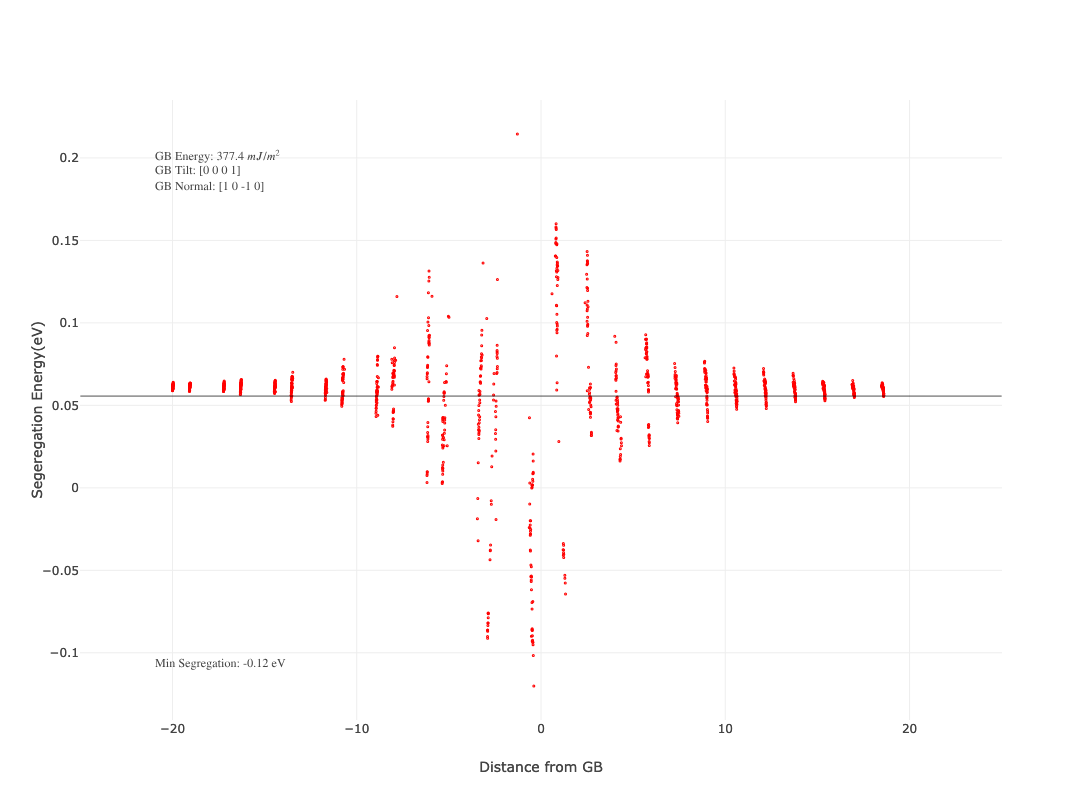

In [151]:
draw_peratom_energy(mat , 15)